# Analiza poatkov

V tej datoteki je analiza podatkov zbranih v csv datotekah v mapi 'zajem-podatkov/obdelani-podatki'. Odgovarjala bom na vprašanja zastavljena v datoteki README.md.

In [55]:
import pandas as pd
import matplotlib

In [56]:
matplotlib.rcParams["figure.figsize"] = [7.5, 5]
matplotlib.rcParams["figure.autolayout"] = True

In [57]:
avti = pd.read_csv('../zajem-podatkov/obdelani-podatki/izluščene_informacije.csv')

In [58]:
avti

,znamka,model,generacija,verzija,prvo leto proizvodnje,gorivo,poravnava motorja,prostornina motorja,moč motorja,prisilno polnenje motorja,pospesevanje,max hitrost,navor,emisije,poraba
0,1,NaN,NaN,T8R,2020.0,hybrid_petrol,Transverse,1969.0,609.0,-,4.2,250.0,1000.0,15.0,1.3
1,100,NaN,NaN,1.1 ate97,1995.0,Petrol,Transverse,1120.0,60.0,NaN,14.8,155.0,90.0,148.0,6.2
2,100,NaN,NaN,1.1,1990.0,Petrol,Transverse,1120.0,60.0,NaN,14.8,155.0,90.0,141.0,5.9
3,100,NaN,NaN,1.4 GTi 16v MPI,1991.0,Petrol,Transverse,1396.0,103.0,NaN,9.5,190.0,127.0,165.0,6.9
4,100,NaN,NaN,1.4 GTi 16v,1990.0,Petrol,Transverse,1396.0,90.0,NaN,9.8,183.0,120.0,155.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,F-150,NaN,NaN,5.4L V8 3V 4x4 8ft box LWB SuperCab,2009.0,Petrol,Longitudinal,5408.0,314.0,NaN,NaN,NaN,495.0,NaN,NaN
799,F-150,NaN,NaN,5.4L V8 3V 4x4 8ft box Regular Cab,2009.0,Petrol,Longitudinal,5408.0,314.0,NaN,NaN,NaN,495.0,NaN,NaN
800,S-Class,NaN,2018 S Class Cabriolet,560,2018.0,Petrol,Longitudinal,3982.0,469.0,NaN,4.6,250.0,700.0,202.0,9.0
801,S-Class,NaN,2018 S Class Cabriolet,63 AMG 4MATIC,2018.0,Petrol,Longitudinal,3982.0,612.0,Turbo Intercooler,3.5,250.0,900.0,229.0,10.1


## 1. Katera vrsta goriva je najpogosteje uporabljena?

Poglejmo najprej katere vrste goriva so sploh zastopane in preštejmo število pojavitev.

In [59]:
avti.gorivo.unique()

array(['hybrid_petrol', 'Petrol', 'Diesel', 'Electric'], dtype=object)

In [60]:
vrednosti = avti.gorivo.value_counts()
okvir_1 = {'Število' : vrednosti}
tabela_goriva = pd.DataFrame(okvir_1)
tabela_goriva

,Število
Petrol,606
Diesel,192
Electric,4
hybrid_petrol,1


<AxesSubplot:ylabel='Število'>

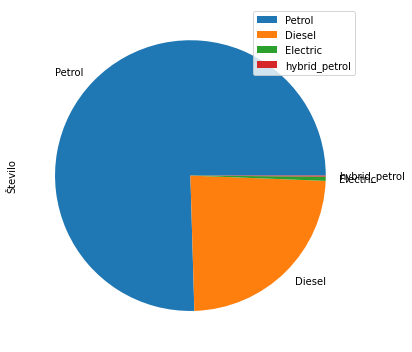

In [61]:
tabela_goriva.plot.pie(y='Število')

Opazimo, da je bencin najbolj uporabljen.

## 2. Je poravnava motorja odvisna od velikosti vozila?

Združimo glavni csv s csv-jem dimenzij.

In [62]:
dimenzije = pd.read_csv('../zajem-podatkov/obdelani-podatki/dimenzije.csv')
dimenzije

,verzija,višina,širina,dolžina,teža
0,T8R,135.2,195.8,458.6,2250.0
1,1.1 ate97,138.0,156.0,356.0,806.0
2,1.1,138.0,156.0,352.0,806.0
3,1.4 GTi 16v MPI,138.0,156.0,352.0,865.0
4,1.4 GTi 16v,138.0,156.0,352.0,859.0
...,...,...,...,...,...
798,5.4L V8 3V 4x4 8ft box LWB SuperCab,194.8,200.4,635.8,2492.0
799,5.4L V8 3V 4x4 8ft box Regular Cab,193.5,200.4,588.5,2356.0
800,560,142.0,189.9,503.2,2050.0
801,63 AMG 4MATIC,142.0,189.9,505.1,2085.0


In [63]:
avti_in_dimenzije = pd.merge(avti, dimenzije, on='verzija')
avti_in_dimenzije[['verzija', 'poravnava motorja', 'višina', 'širina', 'dolžina']]

,verzija,poravnava motorja,višina,širina,dolžina
0,T8R,Transverse,135.2,195.8,458.6
1,1.1 ate97,Transverse,138.0,156.0,356.0
2,1.1,Transverse,138.0,156.0,352.0
3,1.1,Transverse,138.0,156.0,356.0
4,1.1,Transverse,145.0,160.0,348.0
...,...,...,...,...,...
1034,5.4L V8 3V 4x4 8ft box LWB SuperCab,Longitudinal,194.8,200.4,635.8
1035,5.4L V8 3V 4x4 8ft box Regular Cab,Longitudinal,193.5,200.4,588.5
1036,560,Longitudinal,142.0,189.9,503.2
1037,63 AMG 4MATIC,Longitudinal,142.0,189.9,505.1


In [64]:
def velikost(v, s, d): return v * s * d

vrednosti = velikost(avti_in_dimenzije.višina / 100, 
                     avti_in_dimenzije.širina / 100,
                     avti_in_dimenzije.dolžina / 100)

avti_in_dimenzije['velikost'] = vrednosti
tabela_velikosti = avti_in_dimenzije[['poravnava motorja', 'velikost']]
tabela_velikosti

,poravnava motorja,velikost
0,Transverse,12.140133
1,Transverse,7.663968
2,Transverse,7.577856
3,Transverse,7.663968
4,Transverse,8.073600
...,...,...
1034,Longitudinal,24.820310
1035,Longitudinal,22.820500
1036,Longitudinal,13.569191
1037,Longitudinal,13.620426


In [65]:
avti_in_dimenzije.groupby('poravnava motorja').mean()[['velikost']]

,velikost
poravnava motorja,
Longitudinal,13.409168
Transverse,9.967782


Predvidevamo, da so avti z longitudialno postavitvijo motorja večji. Poglejmo še razporeditev po številu avtov določenega razpona velikosti.

In [66]:
avti_in_dimenzije['zaokrožena velikost'] = avti_in_dimenzije.velikost // 1

tabela_zaokroženih_velikosti = avti_in_dimenzije.groupby(['zaokrožena velikost', 'poravnava motorja']).count()[['znamka']]
tabela_zaokroženih_velikosti

znamka
zaokrožena velikost poravnava motorja        
6.0                 Longitudinal            2
                    Transverse              2
7.0                 Longitudinal            8
                    Transverse             40
8.0                 Longitudinal           16
                    Transverse             81
9.0                 Longitudinal           53
                    Transverse            118
10.0                Longitudinal           64
                    Transverse            235
11.0                Longitudinal           42
                    Transverse            103
12.0                Longitudinal           41
                    Transverse             23
13.0                Longitudinal           18
                    Transverse              3
15.0                Longitudinal            2
16.0                Longitudinal            3
20.0                Longitudinal           16
21.0                Longitudinal           10
22.0                Longitudinal           32
23.0                Longitudinal            3
24.0                Longitudinal           10
25.0                Longitudinal            2

poravnava motorja
Longitudinal    AxesSubplot(0.125,0.125;0.775x0.755)
Transverse      AxesSubplot(0.125,0.125;0.775x0.755)
Name: znamka, dtype: object

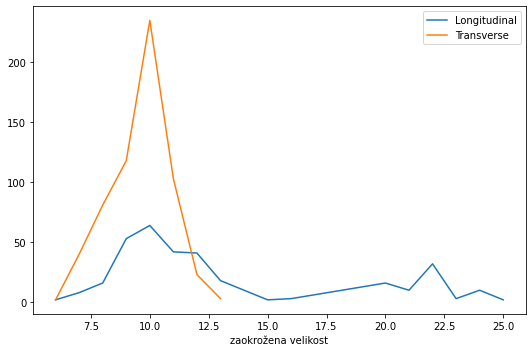

In [67]:
t = tabela_zaokroženih_velikosti.reset_index()
t.set_index('zaokrožena velikost', inplace=True)
t.groupby('poravnava motorja')['znamka'].plot(legend=True)

Opazimo, da so transverzalne poravnave motorjev res značilne za manjša vozila, medtem ko so za večja bolj značilne longitudinalne. 

## 3. Imajo superchargerji ali turbo motorji večjo moč?

In [68]:
a = avti[['znamka', 'prisilno polnenje motorja', 'moč motorja']]
polnjenje_in_moc = a[(a['prisilno polnenje motorja'] == 'Turbo') | 
                     (a['prisilno polnenje motorja'] == 'Supercharger')]
polnjenje_in_moc

,znamka,prisilno polnenje motorja,moč motorja
42,1007,Turbo,68.0
66,107,Turbo,54.0
76,107,Turbo,54.0
204,147,Turbo,170.0
205,147,Turbo,170.0
...,...,...,...
608,208,Turbo,68.0
627,21,Turbo,88.0
628,21,Turbo,175.0
633,21,Turbo,88.0


In [69]:
serija_po_moci = polnjenje_in_moc.groupby(['moč motorja', 'prisilno polnenje motorja']).count()['znamka']
serija_po_moci

moč motorja  prisilno polnenje motorja
54.0         Turbo                         2
68.0         Turbo                        28
70.0         Turbo                         2
78.0         Turbo                         1
85.0         Turbo                         1
86.0         Turbo                         1
88.0         Turbo                         4
90.0         Turbo                         2
92.0         Turbo                         1
100.0        Turbo                         3
110.0        Turbo                         5
130.0        Turbo                         2
170.0        Turbo                         3
171.0        Turbo                         1
175.0        Turbo                         1
200.0        Turbo                         7
220.0        Turbo                         1
Name: znamka, dtype: int64

prisilno polnenje motorja
Turbo    AxesSubplot(0.125,0.125;0.775x0.755)
Name: znamka, dtype: object

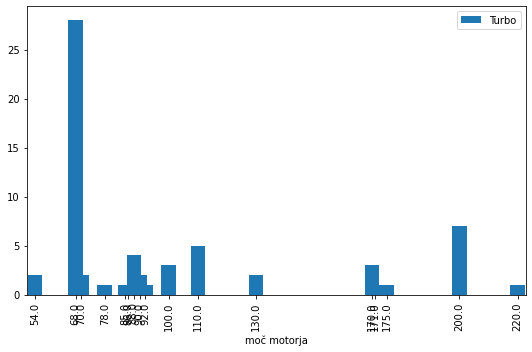

In [70]:
s = serija_po_moci.reset_index()
s.set_index('moč motorja', inplace=True)
s.groupby('prisilno polnenje motorja')['znamka'].plot.bar(legend=True, 
                                                          stacked=False,
                                                          width=5)

## 4. Kako navor vpliva na pospeševanje do $100 \frac{km}{h}$?

In [71]:
navor_in_pospesek = avti[['navor', 'pospesevanje']]
sortiran_navor_in_pospesek = navor_in_pospesek.sort_values('navor').dropna()
sortiran_navor_in_pospesek

,navor,pospesevanje
681,38.0,35.0
680,38.0,35.0
46,62.0,20.0
425,73.0,18.8
51,74.0,19.0
...,...,...
710,650.0,5.0
800,700.0,4.6
801,900.0,3.5
0,1000.0,4.2


<AxesSubplot:xlabel='navor'>

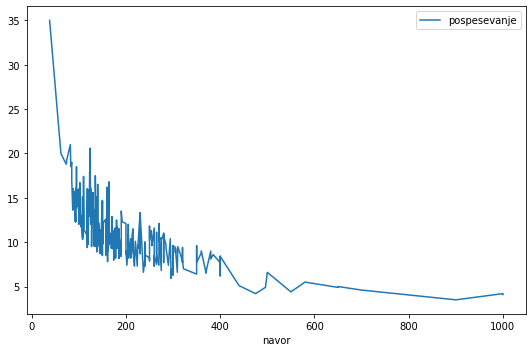

In [72]:
sortiran_navor_in_pospesek.plot(x='navor')

Vidimo, kot je tudi pričakovano, da več navora pomeni večji pospešek. Čas pospeševanja do $100 \frac{km}{h}$ pada eksponentno.

Zanima me kateri avto ima $1000 Nm$ navora.

In [73]:
avti[avti['navor'] == 1000]

,znamka,model,generacija,verzija,prvo leto proizvodnje,gorivo,poravnava motorja,prostornina motorja,moč motorja,prisilno polnenje motorja,pospesevanje,max hitrost,navor,emisije,poraba
0,1,NaN,NaN,T8R,2020.0,hybrid_petrol,Transverse,1969.0,609.0,-,4.2,250.0,1000.0,15.0,1.3
802,S-Class,NaN,2018 S Class Cabriolet,65 AMG,2018.0,Petrol,Longitudinal,5980.0,630.0,Bi-Turbo,4.1,250.0,1000.0,272.0,12.0


Zanimivo.

## 5. Ali je pri večji porabi tudi več emisij $CO_2$?

In [74]:
poraba_in_emisije = avti[['poraba', 'emisije']].dropna().sort_values('poraba')
poraba_in_emisije

,poraba,emisije
0,1.3,15.0
557,3.0,79.0
563,3.0,79.0
553,3.2,85.0
306,3.4,89.0
...,...,...
786,13.8,330.0
787,13.8,330.0
788,13.8,330.0
789,13.8,330.0


<AxesSubplot:xlabel='poraba'>

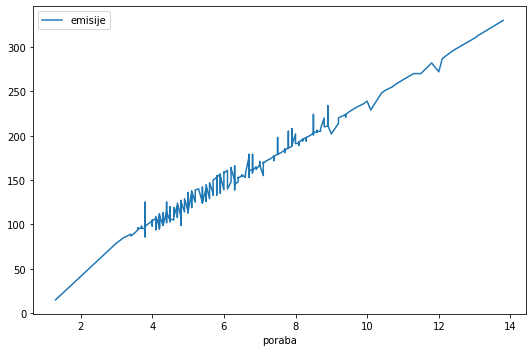

In [75]:
poraba_in_emisije.plot(x='poraba', y='emisije')

Opazimo, da emisije s porabo naraščajo linearno. 

## 6. Kako je skozi leta rastla moč motorja?

In [76]:
ml = avti[['prvo leto proizvodnje', 'moč motorja']].dropna().sort_values('prvo leto proizvodnje')
ml

,prvo leto proizvodnje,moč motorja
213,1937.0,0.0
212,1937.0,0.0
673,1939.0,0.0
672,1939.0,0.0
155,1947.0,118.0
...,...,...
333,2021.0,90.0
332,2021.0,90.0
331,2021.0,75.0
402,2021.0,130.0


In [77]:
moc_in_leta = ml.groupby('prvo leto proizvodnje').mean().round(1)
moc_in_leta

,moč motorja
prvo leto proizvodnje,
1937.0,0.0
1939.0,0.0
1947.0,118.0
1948.0,115.0
1950.0,130.3
...,...
2017.0,138.7
2018.0,321.2
2019.0,123.1


In [78]:
ml_negrupirano = moc_in_leta.reset_index()
ml_negrupirano

,prvo leto proizvodnje,moč motorja
0,1937.0,0.0
1,1939.0,0.0
2,1947.0,118.0
3,1948.0,115.0
4,1950.0,130.3
...,...,...
66,2017.0,138.7
67,2018.0,321.2
68,2019.0,123.1
69,2020.0,609.0


<AxesSubplot:xlabel='prvo leto proizvodnje'>

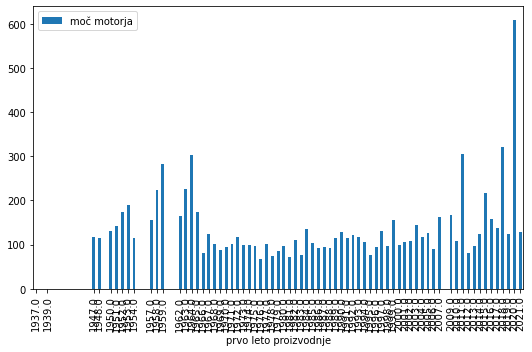

In [79]:
ml_negrupirano.plot.bar(x='prvo leto proizvodnje')

Mislim, da povprečna moč motorja narašča, ali? 

### 7. Kakšne moči so imeli motorji leta 1990 in kakšne leta 2019?

Filtrirajmo na določeno leto.

In [80]:
leto_1990_2019 = avti[(avti['prvo leto proizvodnje'] == 1990) | 
                      (avti['prvo leto proizvodnje'] == 2019)][['moč motorja', 
                                                                'prvo leto proizvodnje',
                                                                'znamka']].sort_values('moč motorja')
leto_1990_2019

,moč motorja,prvo leto proizvodnje,znamka
2,60.0,1990.0,100
547,75.0,2019.0,208
4,90.0,1990.0,100
553,100.0,2019.0,208
541,100.0,2019.0,208
540,100.0,2019.0,208
400,100.0,2019.0,2008
399,100.0,2019.0,2008
538,100.0,2019.0,208
382,102.0,2019.0,2008


In [81]:
prešteti_leti = leto_1990_2019.groupby(['moč motorja', 'prvo leto proizvodnje']).count()
prešteti_leti

,,znamka
moč motorja,prvo leto proizvodnje,
60.0,1990.0,1
75.0,2019.0,1
90.0,1990.0,1
100.0,2019.0,6
102.0,2019.0,1
105.0,1990.0,1
112.0,1990.0,1
116.0,2019.0,2
122.0,1990.0,1


prvo leto proizvodnje
1990.0    AxesSubplot(0.125,0.125;0.775x0.755)
2019.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: znamka, dtype: object

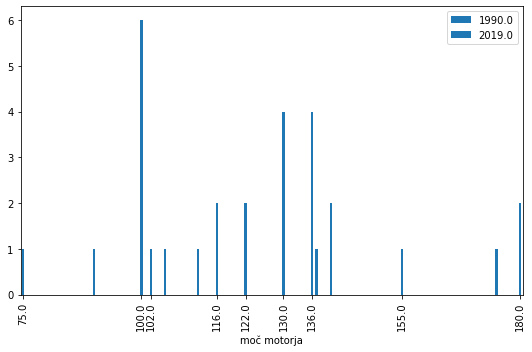

In [82]:
t = prešteti_leti.reset_index()
t.set_index('moč motorja', inplace=True)
t.groupby('prvo leto proizvodnje')['znamka'].plot.bar(legend=True)

## 8. Ali je maksimalna hitrost vozila odvisna od njegove teže?

In [83]:
ht = pd.merge(avti, dimenzije, on='verzija')
hitrost_in_teza = ht[['max hitrost', 'teža']].dropna().sort_values('teža')
hitrost_in_teza

,max hitrost,teža
446,240.0,545.0
917,115.0,560.0
918,115.0,560.0
919,115.0,585.0
312,105.0,600.0
...,...,...
1036,250.0,2050.0
1037,250.0,2085.0
1038,250.0,2155.0
0,250.0,2250.0


<AxesSubplot:xlabel='teža'>

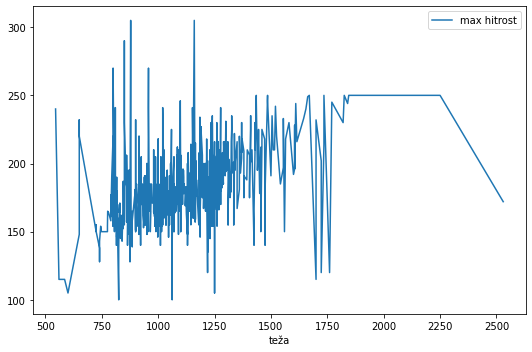

In [84]:
hitrost_in_teza.plot(x='teža', y='max hitrost')

Zgleda kot da res maksimalna hitrost raste s težo.

## 9. Ali je v katerem časovnem obdobju katera znamka izdala več verzij kot ostale?

In [85]:
leta = pd.read_csv('../zajem-podatkov/obdelani-podatki/leta.csv')
leta

,verzija,leto
0,T8R,2020
1,T8R,2021
2,1.1 ate97,1995
3,1.1 ate97,1996
4,1.1 ate97,1997
...,...,...
2481,63 AMG 4MATIC,2021
2482,65 AMG,2018
2483,65 AMG,2019
2484,65 AMG,2020


In [86]:
zl = pd.merge(avti, leta, on='verzija')[['znamka', 'leto', 'verzija']]
zl

,znamka,leto,verzija
0,1,2020,T8R
1,1,2021,T8R
2,100,1995,1.1 ate97
3,100,1996,1.1 ate97
4,100,1997,1.1 ate97
...,...,...,...
3353,S-Class,2021,63 AMG 4MATIC
3354,S-Class,2018,65 AMG
3355,S-Class,2019,65 AMG
3356,S-Class,2020,65 AMG


In [96]:
zl['petletje'] = zl.leto // 5 * 5
znamke_in_leta = zl[['petletje', 'znamka', 'verzija']]
znamke_in_leta

,petletje,znamka,verzija
0,2020,1,T8R
1,2020,1,T8R
2,1995,100,1.1 ate97
3,1995,100,1.1 ate97
4,1995,100,1.1 ate97
...,...,...,...
3353,2020,S-Class,63 AMG 4MATIC
3354,2015,S-Class,65 AMG
3355,2015,S-Class,65 AMG
3356,2020,S-Class,65 AMG


In [88]:
def naredi_series(z):
    shrani = znamke_in_leta[znamke_in_leta.znamka == z]
    return shrani['petletje'].value_counts()

okvir = dict()
for z in list(znamke_in_leta.znamka.unique()):
    okvir[str(z)] = naredi_series(z)

tabela_let_in_znamk = pd.DataFrame(okvir)
tabela_let_in_znamk

,1,100,100 Cabriolet,121 I,2,100 NX,18,200 I,100 Coupe S,159,...,225,2300,288,26.8HP,275,2CV,A6,CLA,F-150,S-Class
1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
1975,NaN,7.0,NaN,NaN,2.0,2.0,7.0,2.0,2.0,2.0,...,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
1980,NaN,23.0,NaN,NaN,2.0,2.0,48.0,2.0,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,15.0,NaN,NaN,NaN,NaN
1985,NaN,41.0,2.0,13.0,5.0,5.0,35.0,17.0,3.0,3.0,...,NaN,NaN,2.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

C:\Users\Lucija\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


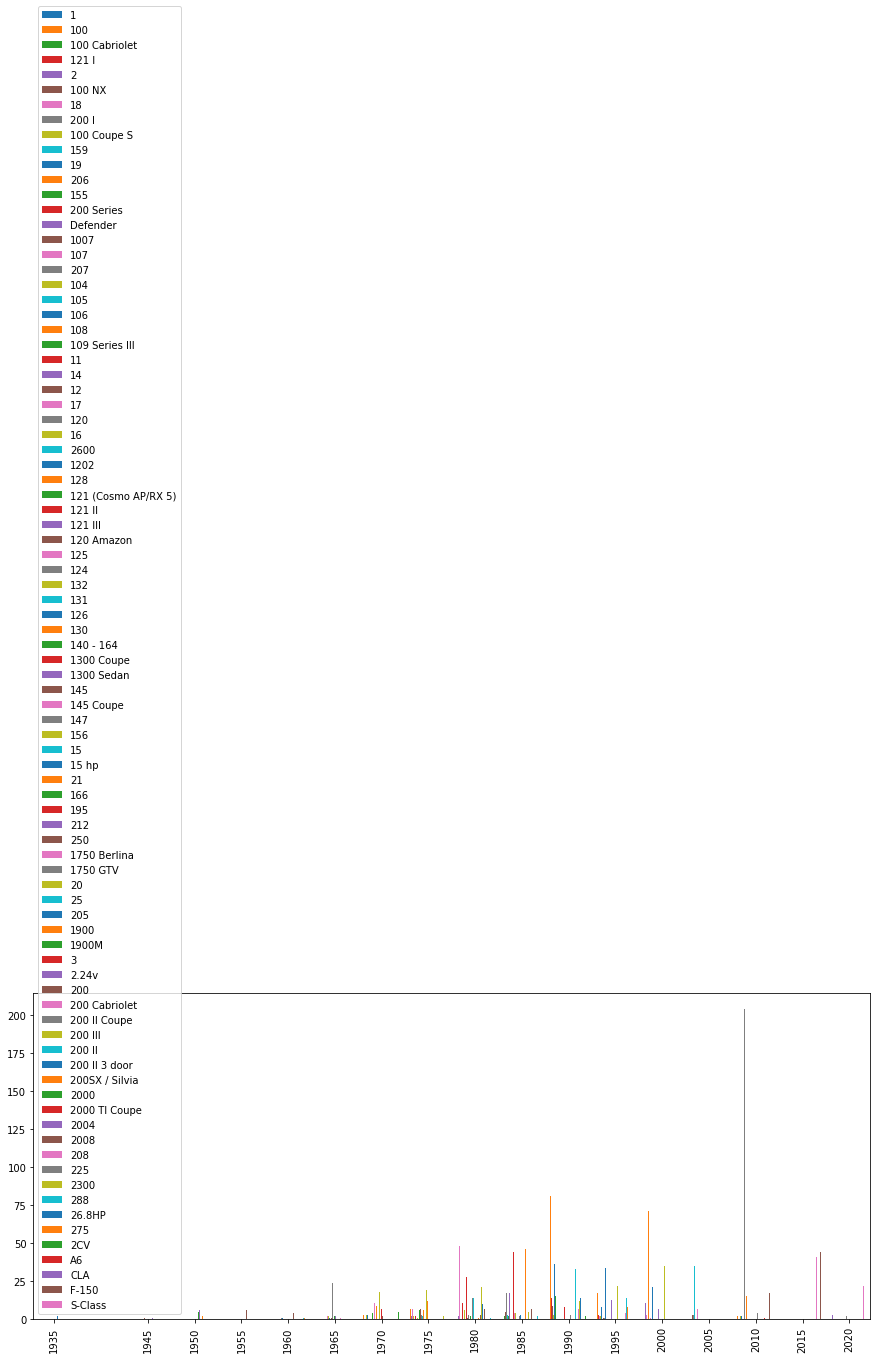

In [95]:
matplotlib.rcParams["figure.figsize"] = [15, 6]
tabela_let_in_znamk.plot.bar(width=4, legend=['Audi'])

Opazimo, da je v devetdesetih letih začela rasti produkcija Audijev, ki je nato hitro upadla. Za tem pa se je začela povečevati produkcija Peugeotov, ki je v prejšnjem petletju dosegla svoj višek. 